In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Zoo.csv')

In [4]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

In [8]:
df2=df.drop("animal name",axis=1,inplace=True)

In [9]:
X = df.drop("type", axis=1)  # features
y = df["type"]   # Target

In [11]:
print(y.value_counts())

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64


In [33]:
# Modeling

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)


In [15]:
# Using Smote to Balance the Target column
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, k_neighbors=1)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [17]:
knn.fit(X_resampled, y_resampled )

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_pred= knn.predict(X_test)

Accuracy: 0.9354838709677419
Precision: 0.9193548387096774
Recall: 0.9354838709677419
F1 Score: 0.9208211143695015

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.83      1.00      0.91         5
           7       1.00      0.67      0.80         3

    accuracy                           0.94        31
   macro avg       0.79      0.81      0.79        31
weighted avg       0.92      0.94      0.92        31



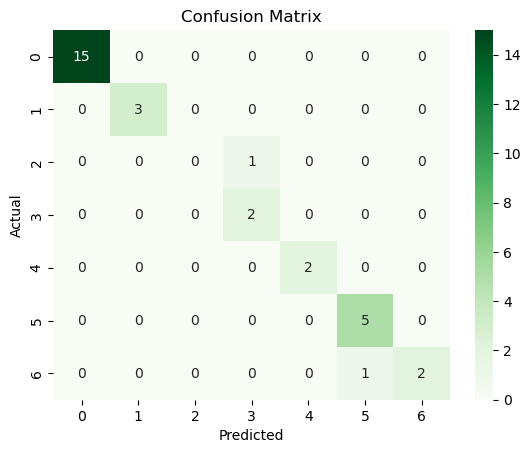

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Finding best k value 

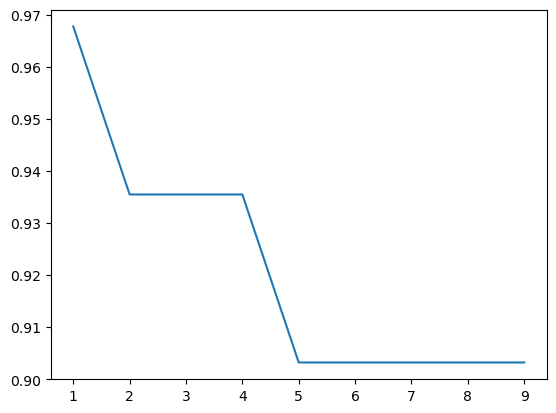

In [20]:
score=[]
for i in range(1,10):
    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_resampled, y_resampled )
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

plt.plot(range(1,10),score)
plt.show()


# As per the Above figure we could see that the best K value is 1 with maximum accuracy

Why K=1 might appear best in this case

For the Zoo dataset, this can actually be expected.
Because:

The dataset is tiny (101 samples)

Most features are binary (0/1) and distinctly separate each animal class

Classes are very well-defined (e.g., mammals vs fish vs insects)

So K=1 can give perfect separation simply because each animal has a unique feature pattern — there’s almost no overlap.

In [23]:
pip install mlxtend


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Decision  Boundry

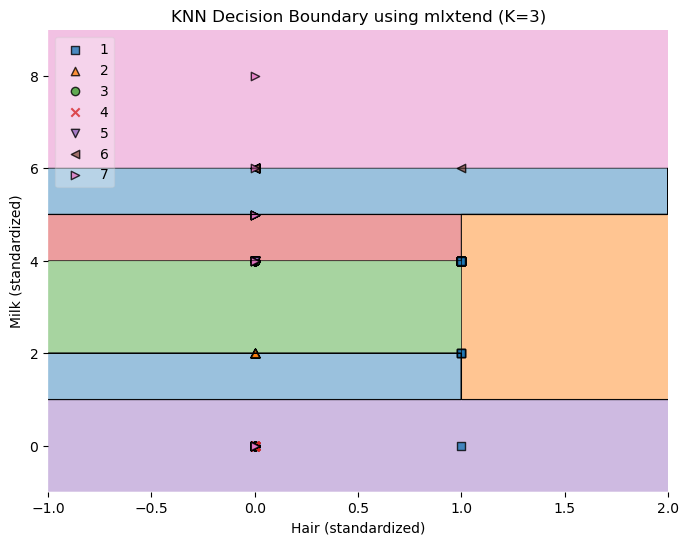

In [27]:

from mlxtend.plotting import plot_decision_regions

# Select 2 features for visualization
X_vis = X_resampled[['hair','legs']].to_numpy()  # example: 0th = hair, 3rd = milk (adjust based on your data)
y_vis = y_resampled.to_numpy()

# Train a new classifier only on these two features
# from sklearn.neighbors import KNeighborsClassifier
knn_vis = KNeighborsClassifier(n_neighbors=3)
knn_vis.fit(X_vis, y_vis)

# Plot decision boundary
plt.figure(figsize=(8,6))
plot_decision_regions(X_vis, y_vis, clf=knn_vis, legend=2)

plt.xlabel("Hair (standardized)")
plt.ylabel("Milk (standardized)")
plt.title("KNN Decision Boundary using mlxtend (K=3)")
plt.show()


# Interview Questions : 

# 1. What are the hypmerparametes in KNN ?
So in KNN, there are a few important hyperparameters that control how the model works.

The first one is the number of neighbors, or the K value. That basically decides how many nearby points the model looks at before making a prediction. If K is too small, the model can overfit; and if it’s too large, it might underfit or miss finer details.

The second one is weights — this tells the model whether all neighbors should have equal importance or if closer neighbors should have more influence.

Then we also have the distance metric, which defines how we measure “closeness.” The most common ones are Euclidean distance and Manhattan distance, depending on the value of p in the Minkowski formula.

And finally, there’s the algorithm parameter, which just helps the model decide how to efficiently search for neighbors — like using KD-tree or Ball-tree for large datasets.
So mainly, we tune K, weights, and the distance metric to get the best performance from KNN.

# 2. What distance metrics can be used in KNN?

In KNN, the most common distance metrics are Euclidean, Manhattan, and Minkowski distances.
Euclidean is for straight-line distance, Manhattan for grid-like paths, and Minkowski is a generalized version of both.
For special data types, we can also use Chebyshev or Hamming distance.